# Data Wrangling

## Acquire

Acquire data from mySQL using the python module to connect and query. You will want to end with a single dataframe. Make sure to include: the logerror, all fields related to the properties that are available. You will end up using all the tables in the database.

* Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid.
* Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction.
* Only include properties that include a latitude and longitude value.

### Imports

In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from env import host, user, password 
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import sklearn.preprocessing
import warnings
warnings.filterwarnings("ignore")

# Exploring
import scipy.stats as stats



In [2]:
def get_connection(db, user=user, host=host, password=password):
    '''
    This function creates a connection to Codeup Database with 
    info from personal env file (env file has user login information).
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'  

In [3]:
def acquire_zillow():
    '''
    This function reads in the zillow data from the Codeup 
    Database connection made from get_connection
    and returns a pandas DataFrame with all columns.
    '''
    sql_query = '''
       SELECT *
       FROM   properties_2017 prop  
       INNER JOIN (SELECT parcelid,
       					  logerror,
                          Max(transactiondate) transactiondate 
                   FROM   predictions_2017 
                   GROUP  BY parcelid, logerror) pred
               USING (parcelid) 
       LEFT JOIN airconditioningtype air USING (airconditioningtypeid) 
       LEFT JOIN architecturalstyletype arch USING (architecturalstyletypeid) 
       LEFT JOIN buildingclasstype build USING (buildingclasstypeid) 
       LEFT JOIN heatingorsystemtype heat USING (heatingorsystemtypeid) 
       LEFT JOIN propertylandusetype landuse USING (propertylandusetypeid) 
       LEFT JOIN storytype story USING (storytypeid) 
       LEFT JOIN typeconstructiontype construct USING (typeconstructiontypeid) 
       WHERE  prop.latitude IS NOT NULL 
       AND prop.longitude IS NOT NULL;
                '''

    
    return pd.read_sql(sql_query, get_connection('zillow'))    


In [4]:
def get_zillow_data(cached=False):
    '''
    This function reads in zillow data from Codeup database and 
    writes data to a csv file if cached == False. If cached == True 
    reads in zillow df from a csv file, returns df.
    '''
    if cached == False or os.path.isfile('zillow.csv') == False:
        
        # Read fresh data from db into a DataFrame.
        df = acquire_zillow()
        
        # Write DataFrame to a csv file.
        df.to_csv('zillow.csv')
        
    else:
        
        # If csv file exists or cached == True, read in data from csv.
        df = pd.read_csv('zillow.csv', index_col=0)
        
    return df


In [5]:
df = acquire_zillow()

In [6]:
df.to_csv("zillow.csv")

In [7]:
df = pd.read_csv("zillow.csv")

Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77575 entries, 0 to 77574
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    77575 non-null  int64  
 1   typeconstructiontypeid        222 non-null    float64
 2   storytypeid                   50 non-null     float64
 3   propertylandusetypeid         77575 non-null  float64
 4   heatingorsystemtypeid         49570 non-null  float64
 5   buildingclasstypeid           15 non-null     float64
 6   architecturalstyletypeid      206 non-null    float64
 7   airconditioningtypeid         25006 non-null  float64
 8   parcelid                      77575 non-null  int64  
 9   id                            77575 non-null  int64  
 10  basementsqft                  50 non-null     float64
 11  bathroomcnt                   77575 non-null  float64
 12  bedroomcnt                    77575 non-null  float64
 13  b

In [9]:
pd.set_option('display.max_columns', None)

In [10]:
df.head()

,Unnamed: 0,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,threequarterbathnbr,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,0,NaN,NaN,261.0,2.0,NaN,NaN,NaN,10711855,1087254,NaN,2.0,3.0,8.0,2.0,NaN,NaN,2107.0,2107.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,34222559.0,-118617387.0,9158.0,1.0,NaN,NaN,NaN,1.0,0101,LARE9,6.037113e+07,12447.0,3101.0,268588.0,96339.0,0.0,NaN,1.0,NaN,NaN,1972.0,NaN,NaN,249655.0,624139.0,2016.0,374484.0,7659.36,NaN,NaN,6.037113e+13,-0.007357,2017-07-07,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
1,1,NaN,NaN,261.0,2.0,NaN,NaN,1.0,10711877,1072280,NaN,2.0,4.0,8.0,2.0,NaN,NaN,1882.0,1882.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,34220261.0,-118616409.0,9035.0,1.0,NaN,NaN,NaN,1.0,0101,LARE9,6.037113e+07,12447.0,3101.0,268588.0,96339.0,0.0,NaN,1.0,NaN,NaN,1972.0,NaN,NaN,253000.0,660000.0,2016.0,407000.0,8123.91,NaN,NaN,6.037113e+13,0.021066,2017-08-29,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN
2,2,NaN,NaN,261.0,2.0,NaN,NaN,1.0,10711888,1340933,NaN,2.0,4.0,8.0,2.0,NaN,NaN,1882.0,1882.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,34222491.0,-118616854.0,9800.0,NaN,NaN,NaN,NaN,NaN,0100,LARE9,6.037113e+07,12447.0,3101.0,268588.0,96339.0,0.0,NaN,1.0,NaN,NaN,1972.0,NaN,NaN,257591.0,542923.0,2016.0,285332.0,6673.24,NaN,NaN,6.037113e+13,0.077174,2017-04-04,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN
3,3,NaN,NaN,261.0,2.0,NaN,NaN,NaN,10711910,1878109,NaN,2.0,3.0,8.0,2.0,NaN,NaN,1477.0,1477.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,34221864.0,-118615739.0,11285.0,1.0,NaN,NaN,NaN,1.0,0101,LARE11,6.037113e+07,12447.0,3101.0,268588.0,96339.0,0.0,NaN,1.0,NaN,NaN,1960.0,NaN,NaN,57968.0,78031.0,2016.0,20063.0,1116.46,NaN,NaN,6.037113e+13,-0.041238,2017-03-17,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,4,NaN,NaN,261.0,2.0,NaN,NaN,NaN,10711923,2190858,NaN,2.0,4.0,8.0,2.0,NaN,NaN,1918.0,1918.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,34220619.0,-118615253.0,11239.0,1.0,NaN,NaN,NaN,1.0,0101,LARE11,6.037113e+07,12447.0,3101.0,268588.0,96339.0,0.0,NaN,1.0,NaN,NaN,1960.0,NaN,NaN,167869.0,415459.0,2016.0,247590.0,5239.85,NaN,NaN,6.037113e+13,-0.009496,2017-03-24,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN


In [11]:
df.describe()

,Unnamed: 0,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,threequarterbathnbr,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,logerror
count,77575.000000,222.000000,50.0,77575.000000,49570.000000,15.000000,206.000000,25006.000000,7.757500e+04,7.757500e+04,50.000000,77575.000000,77575.000000,49809.000000,76960.000000,614.0,6035.000000,77375.000000,73920.000000,42.000000,3027.000000,6035.000000,386.000000,77575.000000,8287.000000,76960.000000,25517.000000,25517.000000,1539.0,7.757500e+04,7.757500e+04,6.931800e+04,16173.0,869.000000,465.0,1074.0,15078.0,7.757500e+04,76103.000000,77575.000000,30973.000000,77525.000000,77575.00000,10105.000000,50703.000000,2393.000000,70.000000,77306.000000,17596.000000,172.0,7.746000e+04,7.757400e+04,77575.0,7.757300e+04,77570.000000,2900.000000,7.732800e+04,77575.000000
mean,38787.000000,6.040541,7.0,261.824467,3.921707,3.933333,7.388350,1.812045,1.300630e+07,1.495352e+06,679.720000,2.298518,3.053252,6.533779,2.316385,66.0,1366.198012,1784.938998,1760.287297,1388.761905,2354.491245,1381.426678,2082.500000,6048.812568,1.191263,2.250104,1.815339,350.055845,1.0,3.400837e+07,-1.182037e+08,2.997445e+04,1.0,517.930955,1.0,1.0,1.0,6.049123e+07,33683.390392,2534.535933,187730.297162,96586.677033,1.47612,1.009599,1.110309,305.460928,216.385714,1968.610936,1.434246,1.0,1.892815e+05,4.901447e+05,2016.0,3.011453e+05,5995.821528,14.088276,6.049666e+13,0.016802
std,22394.117903,0.557285,0.0,5.141701,3.594804,0.258199,2.734542,2.965823,3.478021e+06,8.609703e+05,689.703546,0.996700,1.140440,1.722062,0.979684,0.0,670.803630,954.262540,934.364843,122.220874,1186.985442,725.904022,1240.382784,20.745309,0.491031,0.966479,0.588329,261.651602,0.0,2.652878e+05,3.593826e+05,1.233076e+05,0.0,156.569664,0.0,0.0,0.0,2.058768e+05,47212.856528,801.449852,165045.226146,3793.648751,2.82360,0.118578,1.169967,238.735241,190.177514,23.793197,0.544518,0.0,2.304137e+05,6.538022e+05,0.0,4.927287e+05,7628.869090,2.181281,1.533376e+12,0.170743
min,0.000000,4.000000,7.0,31.000000,1.000000,3.000000,2.000000,1.000000,1.071186e+07,3.490000e+02,38.000000,0.000000,0.000000,1.000000,1.000000,66.0,44.000000,128.000000,128.000000,1056.000000,598.000000,44.000000,380.000000,6037.000000,1.000000,1.000000,0.000000,0.000000,1.0,3.333953e+07,-1.194754e+08,2.360000e+02,1.0,24.000000,1.0,1.0,1.0,6.037101e+07,3491.000000,1286.000000,6952.000000,95982.000000,0.00000,1.000000,1.000000,11.000000,12.000000,1824.000000,1.000000,1.0,4.400000e+01,1.000000e+03,2016.0,1.610000e+02,19.920000,3.000000,6.037101e+13,-4.655420
25%,19393.500000,6.000000,7.0,261.000000,2.000000,4.000000,7.000000,1.000000,1.153820e+07,7.521050e+05,273.000000,2.000000,2.000000,6.000000,2.000000,66.0,955.000000,1182.000000,1172.000000,1344.000000,1624.000000,956.000000,993.750000,6037.000000,1.000000,2.000000,2.000000,0.000000,1.0,3.381463e+07,-1.184150e+08,5.700000e+03,1.0,424.000000,1.0,1.0,1.0,6.037311e+07,12447.000000,1286.000000,46736.000000,96193.000000,0.00000,1.000000,1.000000,170.000000,61.500000,1953.000000,1.000000,1.0,8.418200e+04,2.068985e+05,2016.0,8.529300e+04,2712.630000,14.000000,6.037311e+13,-0.024311
50%,38787.000000,6.000000,7.0,261.000000,2.000000,4.000000,7.000000,1.000000,1.253053e+07,1.498195

In [12]:
df.isnull().sum()

Unnamed: 0                    0
typeconstructiontypeid    77353
storytypeid               77525
propertylandusetypeid         0
heatingorsystemtypeid     28005
                          ...  
buildingclassdesc         77560
heatingorsystemdesc       28005
propertylandusedesc           0
storydesc                 77525
typeconstructiondesc      77353
Length: 69, dtype: int64

In [13]:
df.shape

(77575, 69)

##### value counts function

In [14]:
def count_values(df):
    '''
    This function reads in a dataframe and outputs the column name along 
    with the value counts for each column
    '''
    for column in df.columns:
        if column != 'parcelid'and column != 'id':
            print('Column:', column)
            print(df[column].value_counts())
            print('\n')
        

In [15]:
count_values(df)

Column: Unnamed: 0
2047     1
12947    1
661      1
6806     1
4759     1
        ..
23905    1
17762    1
19811    1
30052    1
0        1
Name: Unnamed: 0, Length: 77575, dtype: int64


Column: typeconstructiontypeid
6.0     219
4.0       1
13.0      1
10.0      1
Name: typeconstructiontypeid, dtype: int64


Column: storytypeid
7.0    50
Name: storytypeid, dtype: int64


Column: propertylandusetypeid
261.0    52439
266.0    19341
246.0     2021
269.0     1947
248.0      729
247.0      539
265.0      335
263.0       74
275.0       59
260.0       41
267.0       29
31.0        15
264.0        6
Name: propertylandusetypeid, dtype: int64


Column: heatingorsystemtypeid
2.0     33633
7.0     14107
24.0      850
6.0       776
20.0      104
13.0       60
18.0       23
1.0        13
10.0        3
11.0        1
Name: heatingorsystemtypeid, dtype: int64


Column: buildingclasstypeid
4.0    14
3.0     1
Name: buildingclasstypeid, dtype: int64


Column: architecturalstyletypeid
7.0     172
8.0   

Name: airconditioningdesc, dtype: int64


Column: architecturalstyledesc
Contemporary     172
Conventional      19
Ranch/Rambler      7
Bungalow           5
Cape Cod           3
Name: architecturalstyledesc, dtype: int64


Column: buildingclassdesc
Buildings having wood or wood and steel frames                                                                                                                                                                                             14
Buildings having exterior walls built of a non-combustible material such as brick, concrete, block or poured concrete. Interior partitions and roof structures are built of combustible materials. Floor may be concrete or wood frame.     1
Name: buildingclassdesc, dtype: int64


Column: heatingorsystemdesc
Central       33633
Floor/Wall    14107
Yes             850
Forced air      776
Solar           104
None             60
Radiant          23
Baseboard        13
Gravity           3
Heat Pump         1
Name: h

##### missing data dataframe function

In [16]:
def null_city(df):
    '''
    This function takes in a dataframe and outputs all the 
    nulls for each column
    '''
    for column in df.columns:
        print('Column:', column)
        print('Null count:', df[column].isnull().sum())
        print('\n')

In [17]:
missing_values(df)

Column: Unnamed: 0
Null count: 0


Column: typeconstructiontypeid
Null count: 77353


Column: storytypeid
Null count: 77525


Column: propertylandusetypeid
Null count: 0


Column: heatingorsystemtypeid
Null count: 28005


Column: buildingclasstypeid
Null count: 77560


Column: architecturalstyletypeid
Null count: 77369


Column: airconditioningtypeid
Null count: 52569


Column: parcelid
Null count: 0


Column: id
Null count: 0


Column: basementsqft
Null count: 77525


Column: bathroomcnt
Null count: 0


Column: bedroomcnt
Null count: 0


Column: buildingqualitytypeid
Null count: 27766


Column: calculatedbathnbr
Null count: 615


Column: decktypeid
Null count: 76961


Column: finishedfloor1squarefeet
Null count: 71540


Column: calculatedfinishedsquarefeet
Null count: 200


Column: finishedsquarefeet12
Null count: 3655


Column: finishedsquarefeet13
Null count: 77533


Column: finishedsquarefeet15
Null count: 74548


Column: finishedsquarefeet50
Null count: 71540


Column: finishedsqu

#### Initial Distributions

In [18]:
def zillow_dist():
    '''
    This function takes in a dataframe and outputs histograms
    of bedrooms, finished area, logerror, and taxvaluedollarcount
    '''
    
    plt.figure(figsize = (12,8))
    plt.subplot(221)
    plt.hist(df.bedroomcnt)
    plt.title('Bedrooms')



    plt.subplot(222)
    plt.hist(df.calculatedfinishedsquarefeet)
    plt.title('finished area')



    plt.subplot(223)
    plt.hist(df.logerror)
    plt.title('logerror')



    plt.subplot(224)
    plt.hist(df.taxvaluedollarcnt)
    plt.title('taxvaluedollarcnt')

    plt.tight_layout();

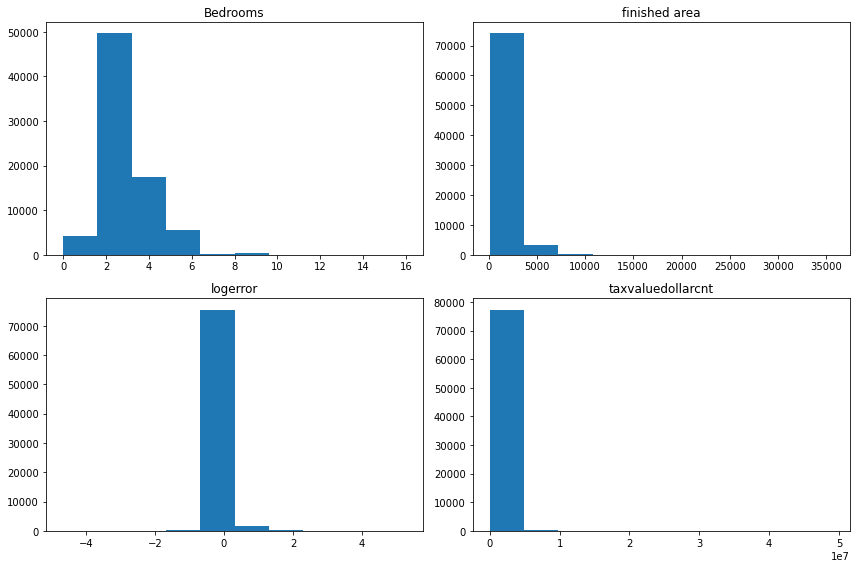

In [19]:
zillow_dist()

Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

In [20]:
def nulls_by_col(df):
    num_missing = df.isnull().sum()
    rows = df.shape[0]
    pct_missing = num_missing / rows
    cols_missing = pd.DataFrame({'number_missing_rows': num_missing, 'percent_rows_missing': pct_missing})
    return cols_missing

In [21]:
nulls_by_column = nulls_by_col(df)
nulls_by_column.sort_values(by="percent_rows_missing", ascending=False).head(40)

,number_missing_rows,percent_rows_missing
buildingclassdesc,77560,0.999807
buildingclasstypeid,77560,0.999807
finishedsquarefeet13,77533,0.999459
storytypeid,77525,0.999355
storydesc,77525,0.999355
basementsqft,77525,0.999355
yardbuildingsqft26,77505,0.999098
fireplaceflag,77403,0.997783
architecturalstyletypeid,77369,0.997345
architecturalstyledesc,77369,0.997345


Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values.¶


In [22]:
def cols_missing(df):
    '''
    A function that takes in a dataframe and returns a dataframe with 3 columns: 
    the number of columns missing, 
    percent of columns missing, 
    and number of rows with n columns missing
    '''
    df2 = pd.DataFrame(df.isnull().sum(axis =1), columns = ['num_cols_missing']).reset_index()\
    .groupby('num_cols_missing').count().reset_index().\
    rename(columns = {'index': 'num_rows' })
    df2['pct_cols_missing'] = df2.num_cols_missing/df.shape[1]
    return df2

In [23]:
# sort values by pc_col_missing
cols_missing(df).sort_values(by = ['pct_cols_missing'], ascending = False)

,num_cols_missing,num_rows,pct_cols_missing
25,48,3,0.695652
24,47,3,0.681159
23,46,5,0.666667
22,45,50,0.652174
21,44,79,0.637681
20,43,29,0.623188
19,42,26,0.608696
18,41,29,0.594203
17,40,230,0.579710
16,39,285,0.565217


Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.

In [24]:

# look at value counts for 'unitcnt'

df.unitcnt.value_counts(dropna = False)

1.0      47413
NaN      26872
2.0       2031
4.0        726
3.0        529
45.0         1
6.0          1
237.0        1
42.0         1
Name: unitcnt, dtype: int64

In [25]:
# Restrict df to only properties that meet single unit criteria

single_use = [261, 262, 263, 264, 266, 268, 273, 276, 279]
df = df[df.propertylandusetypeid.isin(single_use)]
    
    
# Restrict df to only those properties with at least 1 bath & bed and >350 sqft area
df = df[(df.bedroomcnt > 0) & (df.bathroomcnt > 0) & ((df.unitcnt<=1)|df.unitcnt.isnull()) & (df.calculatedfinishedsquarefeet>350)]

Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

In [26]:
def handle_missing_values(df, prop_required_column = .5, prop_required_row = .70):
    '''
    A function that will drop rows or columns based on the percent of values that are missing: 
    handle_missing_values(df, prop_required_column, prop_required_row)
    '''
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df

In [27]:
# use the function defined above:

df = handle_missing_values(df)

In [28]:
# check shape to see how many columns and rows were dropped

df.shape

(71356, 35)

In [29]:

# look at number of nulls for each column
df.isnull().sum()

Unnamed: 0                          0
propertylandusetypeid               0
heatingorsystemtypeid           24943
parcelid                            0
id                                  0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           26514
calculatedbathnbr                  15
calculatedfinishedsquarefeet        0
finishedsquarefeet12              167
fips                                0
fullbathcnt                        15
latitude                            0
longitude                           0
lotsizesquarefeet                8034
propertycountylandusecode           0
propertyzoningdesc              26221
rawcensustractandblock              0
regionidcity                     1322
regionidcounty                      0
regionidzip                        40
roomcnt                             0
unitcnt                         26195
yearbuilt                          35
structuretaxvaluedollarcnt         75
taxvaluedoll

In [30]:
df.columns

Index(['Unnamed: 0', 'propertylandusetypeid', 'heatingorsystemtypeid',
       'parcelid', 'id', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedbathnbr', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'fips', 'fullbathcnt', 'latitude', 'longitude',
       'lotsizesquarefeet', 'propertycountylandusecode', 'propertyzoningdesc',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidzip', 'roomcnt', 'unitcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount', 'censustractandblock', 'logerror',
       'transactiondate', 'heatingorsystemdesc', 'propertylandusedesc'],
      dtype='object')

In [31]:
# use your judgement to remove certain columns which you don't need

cols_to_remove = ['propertylandusetypeid', 'heatingorsystemtypeid','id',
       'calculatedbathnbr', 'finishedsquarefeet12', 'fullbathcnt', 'heatingorsystemtypeid'
       ,'propertycountylandusecode', 'propertylandusetypeid','propertyzoningdesc', 
        'censustractandblock', 'propertylandusedesc']

In [32]:
def remove_columns(df, cols_to_remove):  
    '''
    A function that will drop columns you want removed from dataframe
    '''
    df = df.drop(columns=cols_to_remove)
    return df

In [33]:
# use the function defined above to remove the columns not needed:

df = remove_columns(df, cols_to_remove)

In [34]:
# take a look at null counts again

df.isnull().sum()

Unnamed: 0                          0
parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           26514
calculatedfinishedsquarefeet        0
fips                                0
latitude                            0
longitude                           0
lotsizesquarefeet                8034
rawcensustractandblock              0
regionidcity                     1322
regionidcounty                      0
regionidzip                        40
roomcnt                             0
unitcnt                         26195
yearbuilt                          35
structuretaxvaluedollarcnt         75
taxvaluedollarcnt                   1
assessmentyear                      0
landtaxvaluedollarcnt               1
taxamount                           5
logerror                            0
transactiondate                     0
heatingorsystemdesc             24943
dtype: int64

In [35]:
# let's look at heatingorsystemdesc value counts

df.heatingorsystemdesc.value_counts(dropna = False)

Central       31357
NaN           24943
Floor/Wall    13230
Yes             850
Forced air      775
Solar           101
None             60
Radiant          23
Baseboard        13
Gravity           3
Heat Pump         1
Name: heatingorsystemdesc, dtype: int64

In [36]:
# I assume that since this is Southern CA, 'null' probably means 'None' for heating system

df.heatingorsystemdesc.fillna('None', inplace = True)

In [37]:
df.unitcnt.value_counts(dropna = False)

1.0    45161
NaN    26195
Name: unitcnt, dtype: int64

In [38]:
# For unit counts, I will fill 'NaN' with unit count of 1

df.unitcnt.fillna(1, inplace = True)

In [39]:

# buildingqualitytypeid
# Overall assessment of condition of the building from 
# low number = best quality
# higher numbersw = worse quality

df.buildingqualitytypeid.value_counts(dropna = False)

NaN     26514
8.0     13404
6.0     12673
4.0      8227
7.0      5505
9.0      2113
5.0      1499
11.0      846
10.0      301
3.0       149
12.0      113
1.0         9
2.0         3
Name: buildingqualitytypeid, dtype: int64

<AxesSubplot:>

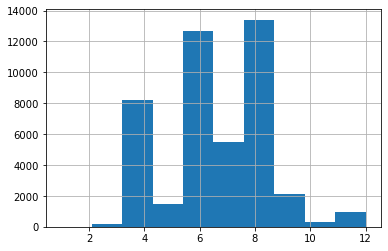

In [40]:
# look at distrubition of buildingqualitytypeid

df.buildingqualitytypeid.hist()

In [41]:
# what is the median value of buildingqualitytypeid?

df.buildingqualitytypeid.median()

6.0

In [42]:
# fill missing values for buildingqualitytypeid with median value
df.buildingqualitytypeid.fillna(6.0, inplace = True)

In [43]:
df.isnull().sum()

Unnamed: 0                         0
parcelid                           0
bathroomcnt                        0
bedroomcnt                         0
buildingqualitytypeid              0
calculatedfinishedsquarefeet       0
fips                               0
latitude                           0
longitude                          0
lotsizesquarefeet               8034
rawcensustractandblock             0
regionidcity                    1322
regionidcounty                     0
regionidzip                       40
roomcnt                            0
unitcnt                            0
yearbuilt                         35
structuretaxvaluedollarcnt        75
taxvaluedollarcnt                  1
assessmentyear                     0
landtaxvaluedollarcnt              1
taxamount                          5
logerror                           0
transactiondate                    0
heatingorsystemdesc                0
dtype: int64

<AxesSubplot:>

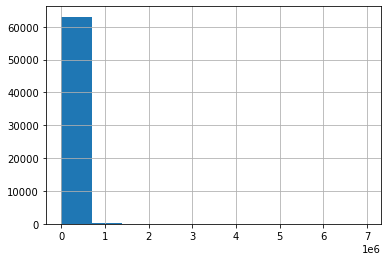

In [44]:
# look at lot-size distribution
df.lotsizesquarefeet.hist()

In [45]:
# what is the median lot size?

df.lotsizesquarefeet.median()

7313.0

In [46]:
# fill missing values with median null sizes

df.lotsizesquarefeet.fillna(7313, inplace = True)

In [47]:
df.isnull().sum()


Unnamed: 0                         0
parcelid                           0
bathroomcnt                        0
bedroomcnt                         0
buildingqualitytypeid              0
calculatedfinishedsquarefeet       0
fips                               0
latitude                           0
longitude                          0
lotsizesquarefeet                  0
rawcensustractandblock             0
regionidcity                    1322
regionidcounty                     0
regionidzip                       40
roomcnt                            0
unitcnt                            0
yearbuilt                         35
structuretaxvaluedollarcnt        75
taxvaluedollarcnt                  1
assessmentyear                     0
landtaxvaluedollarcnt              1
taxamount                          5
logerror                           0
transactiondate                    0
heatingorsystemdesc                0
dtype: int64

In [48]:
# I am going to drop the rest of nulls 

df.dropna(inplace = True)

In [49]:
# How many rows and columns are left?

df.shape

(69920, 25)

In [50]:
df.head()

,Unnamed: 0,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc
0,0,10711855,2.0,3.0,8.0,2107.0,6037.0,34222559.0,-118617387.0,9158.0,6.037113e+07,12447.0,3101.0,96339.0,0.0,1.0,1972.0,249655.0,624139.0,2016.0,374484.0,7659.36,-0.007357,2017-07-07,Central
1,1,10711877,2.0,4.0,8.0,1882.0,6037.0,34220261.0,-118616409.0,9035.0,6.037113e+07,12447.0,3101.0,96339.0,0.0,1.0,1972.0,253000.0,660000.0,2016.0,407000.0,8123.91,0.021066,2017-08-29,Central
2,2,10711888,2.0,4.0,8.0,1882.0,6037.0,34222491.0,-118616854.0,9800.0,6.037113e+07,12447.0,3101.0,96339.0,0.0,1.0,1972.0,257591.0,542923.0,2016.0,285332.0,6673.24,0.077174,2017-04-04,Central
3,3,10711910,2.0,3.0,8.0,1477.0,6037.0,34221864.0,-118615739.0,11285.0,6.037113e+07,12447.0,3101.0,96339.0,0.0,1.0,1960.0,57968.0,78031.0,2016.0,20063.0,1116.46,-0.041238,2017-03-17,Central
4,4,10711923,2.0,4.0,8.0,1918.0,6037.0,34220619.0,-118615253.0,11239.0,6.037113e+07,12447.0,3101.0,96339.0,0.0,1.0,1960.0,167869.0,415459.0,2016.0,247590.0,5239.85,-0.009496,2017-03-24,Central


<AxesSubplot:ylabel='taxvaluedollarcnt'>

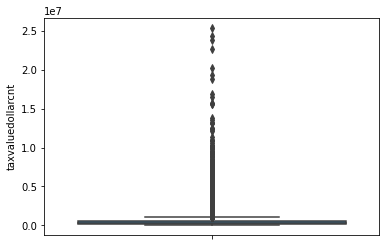

In [51]:
# plt.subplot(221)
sns.boxplot(y = 'taxvaluedollarcnt', data = df)


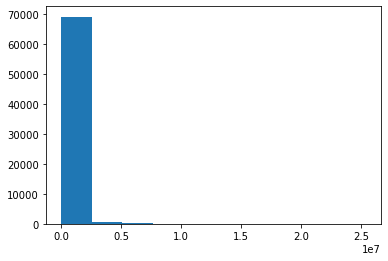

In [52]:
#Histograms for taxvalue of properties

plt.hist(df.taxvaluedollarcnt);

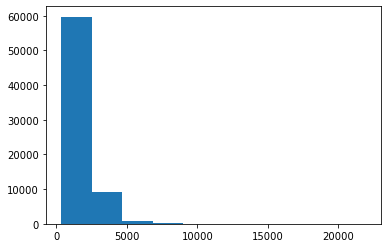

In [53]:
#Histograms for covered sq ft of properties

plt.hist(df.calculatedfinishedsquarefeet);

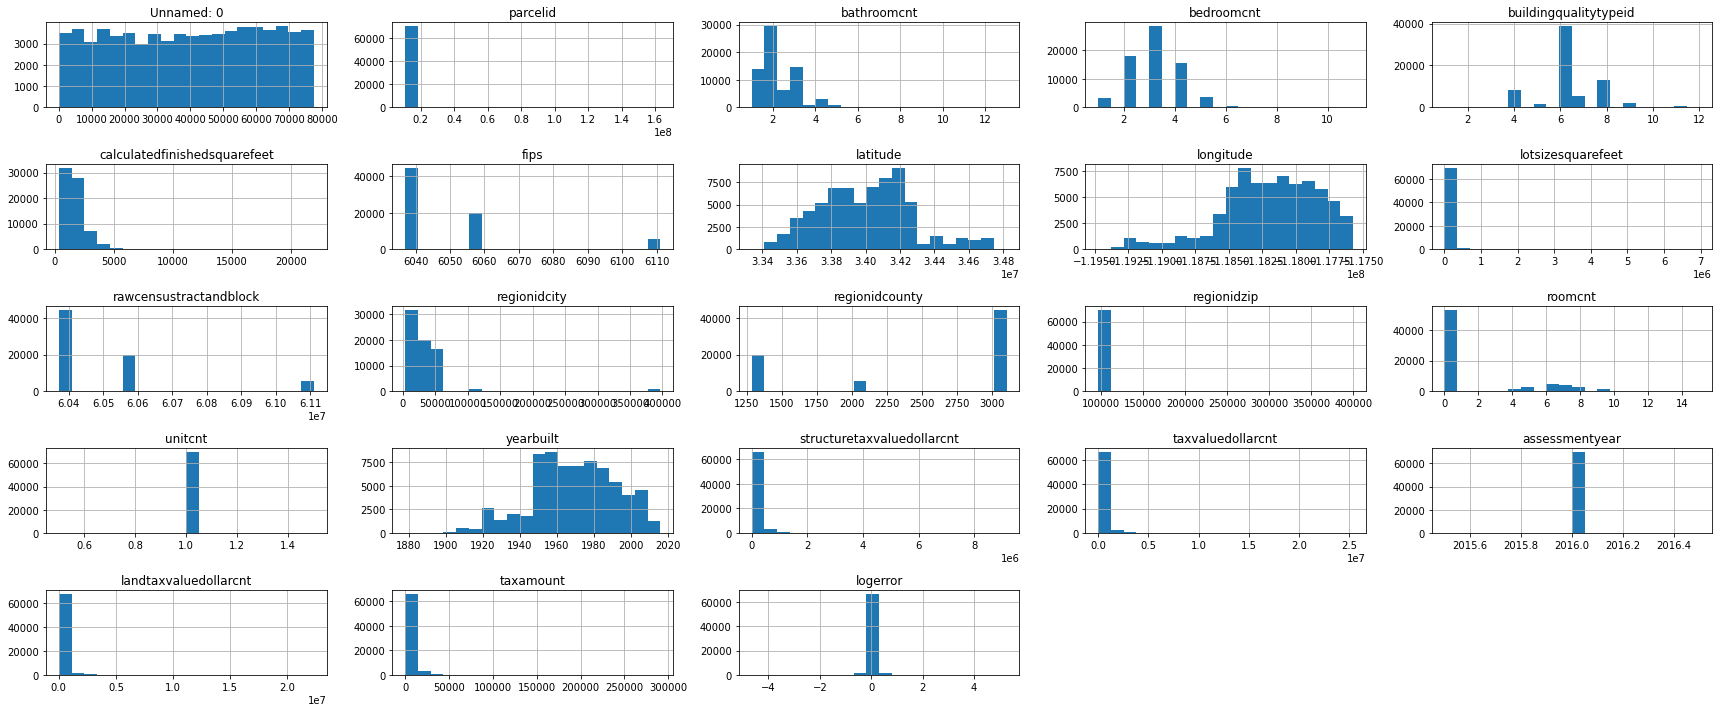

In [54]:
# look at distributions for all columns

df.hist(figsize=(24, 10), bins=20)
plt.tight_layout();

In [55]:

# Remove properties valued more than 5 million dollars

df = df[df.taxvaluedollarcnt < 5_000_000]
df.shape

(69730, 25)

In [56]:
# Remove properties valued more than 8000 square feet

df[df.calculatedfinishedsquarefeet < 8000]
df.shape

(69730, 25)

In [57]:
def wrangle_zillow():
    '''
    A function that will handle erroneous data, handle missing values,
    remove columns, add columns, replace nulls, fill nulls, and drop nulls
    for zillow dataset
    '''
    df = pd.read_csv('zillow.csv')
    
    # Restrict df to only properties that meet single unit use criteria
    single_use = [261, 262, 263, 264, 266, 268, 273, 276, 279]
    df = df[df.propertylandusetypeid.isin(single_use)]
    
    # Restrict df to only those properties with at least 1 bath & bed and 350 sqft area
    df = df[(df.bedroomcnt > 0) & (df.bathroomcnt > 0) & ((df.unitcnt<=1)|df.unitcnt.isnull())\
            & (df.calculatedfinishedsquarefeet>350)]

    # Handle missing values i.e. drop columns and rows based on a threshold
    df = handle_missing_values(df)
    
    # Add column for counties
    df['county'] = np.where(df.fips == 6037, 'Los_Angeles',
                           np.where(df.fips == 6059, 'Orange', 
                                   'Ventura'))    
    # drop columns not needed
    df = remove_columns(df, ['id',
       'calculatedbathnbr', 'finishedsquarefeet12', 'fullbathcnt', 'heatingorsystemtypeid'
       ,'propertycountylandusecode', 'propertylandusetypeid','propertyzoningdesc', 
        'censustractandblock', 'propertylandusedesc'])


    # replace nulls in unitcnt with 1
    df.unitcnt.fillna(1, inplace = True)
    
    # assume that since this is Southern CA, null means 'None' for heating system
    df.heatingorsystemdesc.fillna('None', inplace = True)
    
    # replace nulls with median values for select columns
    df.lotsizesquarefeet.fillna(7313, inplace = True)
    df.buildingqualitytypeid.fillna(6.0, inplace = True)

    # Columns to look for outliers
    df = df[df.taxvaluedollarcnt < 5_000_000]
    df[df.calculatedfinishedsquarefeet < 8000]
    
    # Just to be sure we caught all nulls, drop them here
    df = df.dropna()
    
    return df


In [58]:

df = wrangle_zillow()
df.head()

,Unnamed: 0,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,county
0,0,10711855,2.0,3.0,8.0,2107.0,6037.0,34222559.0,-118617387.0,9158.0,6.037113e+07,12447.0,3101.0,96339.0,0.0,1.0,1972.0,249655.0,624139.0,2016.0,374484.0,7659.36,-0.007357,2017-07-07,Central,Los_Angeles
1,1,10711877,2.0,4.0,8.0,1882.0,6037.0,34220261.0,-118616409.0,9035.0,6.037113e+07,12447.0,3101.0,96339.0,0.0,1.0,1972.0,253000.0,660000.0,2016.0,407000.0,8123.91,0.021066,2017-08-29,Central,Los_Angeles
2,2,10711888,2.0,4.0,8.0,1882.0,6037.0,34222491.0,-118616854.0,9800.0,6.037113e+07,12447.0,3101.0,96339.0,0.0,1.0,1972.0,257591.0,542923.0,2016.0,285332.0,6673.24,0.077174,2017-04-04,Central,Los_Angeles
3,3,10711910,2.0,3.0,8.0,1477.0,6037.0,34221864.0,-118615739.0,11285.0,6.037113e+07,12447.0,3101.0,96339.0,0.0,1.0,1960.0,57968.0,78031.0,2016.0,20063.0,1116.46,-0.041238,2017-03-17,Central,Los_Angeles
4,4,10711923,2.0,4.0,8.0,1918.0,6037.0,34220619.0,-118615253.0,11239.0,6.037113e+07,12447.0,3101.0,96339.0,0.0,1.0,1960.0,167869.0,415459.0,2016.0,247590.0,5239.85,-0.009496,2017-03-24,Central,Los_Angeles


In [59]:
df.shape

(69730, 26)

### Mall Customers

In [60]:
sql_query = 'select * from customers'

In [64]:
# acquire mall customers data using the query:

def get_mall_customers(sql):
    url = get_connection('mall_customers')
    mall_df = pd.read_sql(sql_query, url, index_col='customer_id')
    return mall_df

In [65]:

# acquire data

mall_df = get_mall_customers(sql_query)

In [66]:
mall_df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [67]:
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [68]:
mall_df.shape


(200, 4)

In [69]:
mall_df.describe()


,age,annual_income,spending_score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [70]:
mall_df.isnull().sum()


gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

In [71]:
mall_df.gender.value_counts()


Female    112
Male       88
Name: gender, dtype: int64

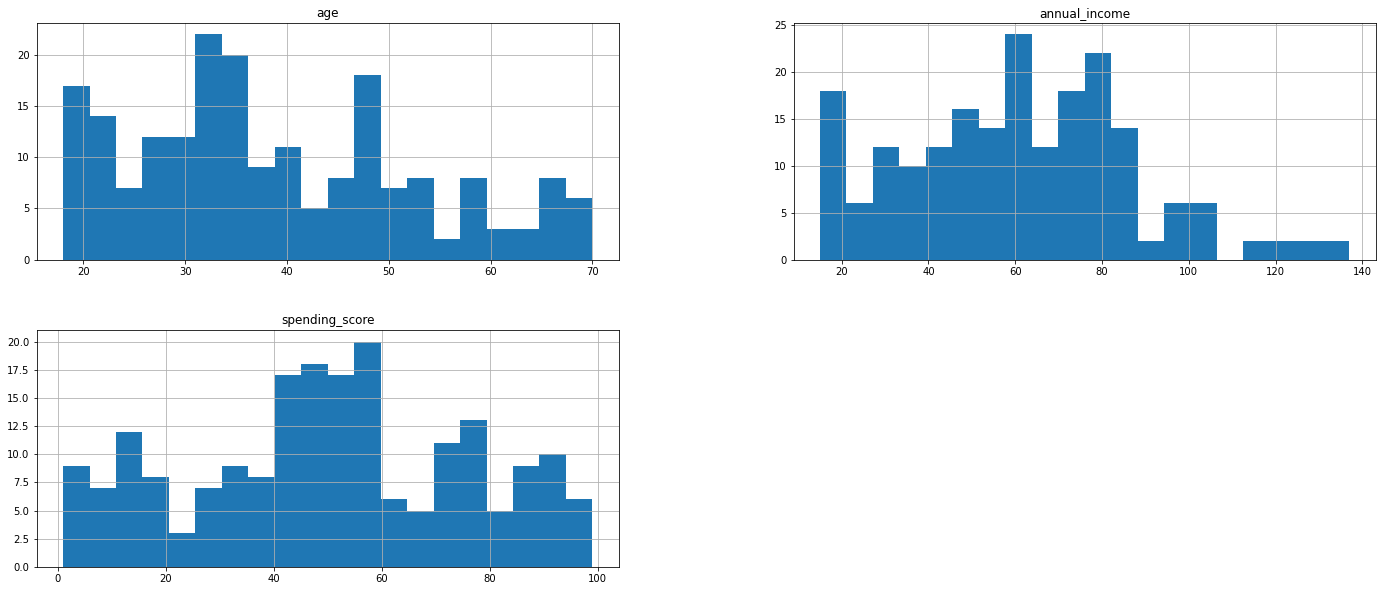

In [72]:
mall_df.hist(figsize=(24, 10), bins=20);


<AxesSubplot:ylabel='spending_score'>

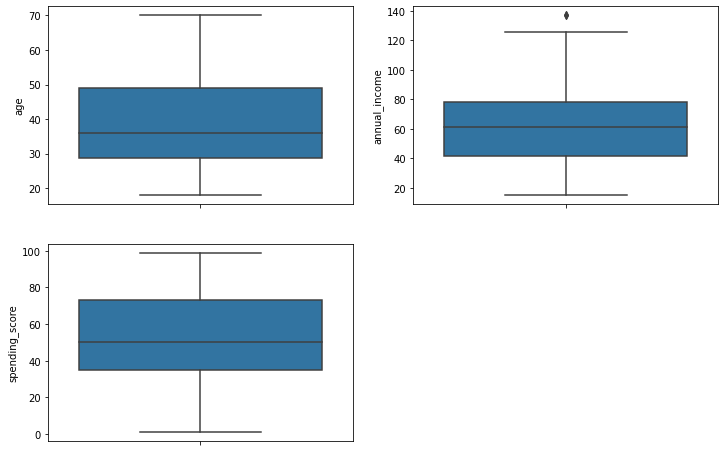

In [73]:
# visualize outliers using boxplots:

plt.figure(figsize = (12,8))
plt.subplot(221)
sns.boxplot(y = mall_df.age)

plt.subplot(222)
sns.boxplot(y = mall_df.annual_income)

plt.subplot(223)
sns.boxplot(y = mall_df.spending_score)

In [74]:
# Calculate q1, q3 and iqr for income

q1 = mall_df.annual_income.quantile(0.25)
q3 = mall_df.annual_income.quantile(0.75)
iqr = q3 - q1
k = 1.5

# calculate upper and lower ranges
upper_bound_income =  q3 + k * iqr
lower_bound_income =  q1 - k * iqr

upper_bound_income

132.75

In [75]:
# function to detect and eliminate outliers using IQR rule

def outlier_function(df, cols, k):
    for col in df[cols]:
        q1 = mall_df.annual_income.quantile(0.25)
        q3 = mall_df.annual_income.quantile(0.75)
        iqr = q3 - q1
        upper_bound =  q3 + k * iqr
        lower_bound =  q1 - k * iqr     
        df = df[(df[col] < upper_bound) & (df[col] > lower_bound)]
    return df

In [76]:
# use the outlier function defined above to handle outliers in numeric columns. k = 1.5

mall_df = outlier_function(mall_df, ['age', 'spending_score', 'annual_income'], 1.5)
mall_df.shape

(198, 4)

In [77]:
# encode the gender column

dummy_df = pd.get_dummies(mall_df.gender, drop_first=True)
dummy_df.head()

,Male
customer_id,
1,1
2,1
3,0
4,0
5,0


In [78]:
# concat the dummies df with original df. Drop the 'gender' column

mall_df = pd.concat([mall_df, dummy_df], axis=1).drop(columns = ['gender'])
mall_df.head()

,age,annual_income,spending_score,Male
customer_id,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0


Split data (train, validate, and test split)

In [80]:
train, test = train_test_split(mall_df, train_size = 0.8, random_state = 123)
train, validate = train_test_split(train, train_size = 0.75, random_state = 123)

In [81]:
# check shape
train.shape, validate.shape, test.shape


((118, 4), (40, 4), (40, 4))

Encode categorical columns using a one hot encoder (pd.get_dummies).

Scaling numeric columns

In [83]:
def min_max_scaler(train, valid, test):
    '''
    Uses the train & test datasets created by the split_my_data function
    Returns 3 items: mm_scaler, train_scaled_mm, test_scaled_mm
    This is a linear transformation. Values will lie between 0 and 1
    '''
    num_vars = list(train.select_dtypes('number').columns)
    scaler = MinMaxScaler(copy=True, feature_range=(0,1))
    train[num_vars] = scaler.fit_transform(train[num_vars])
    valid[num_vars] = scaler.transform(valid[num_vars])
    test[num_vars] = scaler.transform(test[num_vars])
    return scaler, train, valid, test

In [84]:
train.select_dtypes('number').columns


Index(['age', 'annual_income', 'spending_score', 'Male'], dtype='object')

In [87]:

# use the scaler
scaler, train_scaled, validate_scaled, test_scaled = min_max_scaler(train, validate, test)

In [88]:
train_scaled.head()

,age,annual_income,spending_score,Male
customer_id,,,,
182,0.269231,0.738739,0.867347,0.0
49,0.211538,0.225225,0.418367,0.0
35,0.596154,0.162162,0.132653,0.0
186,0.230769,0.756757,0.979592,1.0
114,0.019231,0.441441,0.459184,1.0


In [89]:
# Write a master wrangle fuction which acquires and prepares the data

def wrangle_mall_df():
    
    # acquire data
    sql = 'select * from customers'
    mall_df = get_mall_customers(sql)
    
    # handle outliers
    mall_df = outlier_function(mall_df, ['age', 'spending_score', 'annual_income'], 1.5)
    
    # get dummy for gender column
    dummy_df = pd.get_dummies(mall_df.gender, drop_first=True)
    mall_df = pd.concat([mall_df, dummy_df], axis=1).drop(columns = ['gender'])

    # split the data in train, validate and test
    train, test = train_test_split(mall_df, train_size = 0.8, random_state = 123)
    train, validate = train_test_split(train, train_size = 0.75, random_state = 123)
    
    return min_max_scaler(train, validate, test)

In [90]:

# use the wrangle function:

scaler, train_scaled, validate_scaled, test_scaled = wrangle_mall_df()

In [91]:
train_scaled.head(3)

,age,annual_income,spending_score,Male
customer_id,,,,
182,0.269231,0.738739,0.867347,0.0
49,0.211538,0.225225,0.418367,0.0
35,0.596154,0.162162,0.132653,0.0


In [92]:

# check shape of scaled dfs

train_scaled.shape, validate_scaled.shape, test_scaled.shape

((118, 4), (40, 4), (40, 4))

In [94]:

# check if wrangle.py works as intended for zillow data:

wrangle.wrangle_zillow()

In [ ]:
# check if wrangle.py works as intended for mall_customers:


scaler, train_scaled, validate_scaled, test_scaled = wrangle.wrangle_mall_df()